# IC 4.10 Part 2_Customer Profiling and Visualizations

# Table of Contents
##### 1. Import Libraries and Data
##### 2. Create Profiling Variables
    2.1 Dependents Group
    2.2 Customer Profile Variable
##### 3. Visualization for Distribution of Customer Profiles
##### 4. Basic Statistics on Customer Profile level for Usage Grequency and Expenditure
##### 5. Comparison of Customer Profiles with Regions and Departments
    5.1 Customer profiles by region
    5.2 Age Groups by Region
    5.3 Income Groups by Region
    5.4 Dependents Groups by Region
##### 6. Top Departments
##### 7. Export Charts
##### 8. Export Data

## 1. Import Libraries and Data

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import scipy

In [3]:
# Create path
path = r'C:\Users\ashle\Documents\07-2024 Instacart Basket Analysis'

# Import data
df_secured_with_exclusion = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'secured_with_exclusion.pkl'))
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

## 2. Create Profiling Variables

Demographic Variables: 

- Dependents: Has dependents, No dependents
- Income Groups: high, middle, low (created in 4.10 IC Part 1.a)
- Age Groups: young_adult, adult, older_adult, senior (created in 4.10 IC Part 1.a)
- Family Status: single, married, divorced/widowed, living with parents and siblings

Customer Profiles: 
- Single with No Dependents
- Single with Dependents
- Married Adult with No Dependents
- Married Adult with Dependents
- Divorced/widowed with No Dependents
- Divorced/Widowed with Dependents
- Living with parents/siblings with No Dependents
- Living with parents/siblings with Dependents

### 2.1 Dependents Group

In [8]:
# Define get_dependents
def get_dependents(number_of_dependents):
    if number_of_dependents > 0:
        return 'Has dependents'
    else:
        return 'No dependents'

# Apply the dependents_flag function
df_secured_with_exclusion['dependents_flag'] = df_secured_with_exclusion['number_of_dependents'].apply(get_dependents)

In [9]:
df_secured_with_exclusion['dependents_flag'].value_counts()

dependents_flag
Has dependents    23224883
No dependents      7739681
Name: count, dtype: int64

### 2.2 Customer Profile Variable

In [10]:
# Define the function to create profiles
def create_profile(row):
    return f"{row['family_status']}, {row['dependents_flag']}"

# Apply the function to create a new column 'customer_profile'
df_secured_with_exclusion['customer_profile'] = df_secured_with_exclusion.apply(create_profile, axis=1)

In [11]:
df_secured_with_exclusion.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,income_group,age_group,region,activity_level,dependents_flag,alcohol_flag,pets_flag,babies_flag,total_expenditure,customer_profile
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Low income,Adult,South,High-activity customer,Has dependents,0,0,0,375.7,"married, Has dependents"
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Low income,Adult,South,High-activity customer,Has dependents,0,0,0,375.7,"married, Has dependents"
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Low income,Adult,South,High-activity customer,Has dependents,0,0,0,375.7,"married, Has dependents"
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Low income,Adult,South,High-activity customer,Has dependents,0,0,0,375.7,"married, Has dependents"
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Low income,Adult,South,High-activity customer,Has dependents,0,0,0,375.7,"married, Has dependents"


## 3. Visualization for Distribution of Customer Profiles

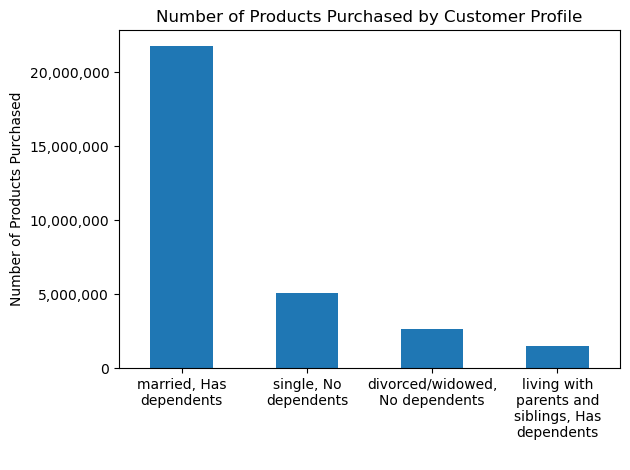

In [126]:
import textwrap

# Create chart showing distribution of customers by 'customer_profile'
counts = df_secured_with_exclusion['customer_profile'].value_counts()
ax = counts.plot.bar()

plt.title('Number of Products Purchased by Customer Profile')
plt.xlabel(' ')
plt.ylabel('Number of Products Purchased')

# Format y-axis values
def value_formatter(x, pos):
    return f'{x:,.0f}'
plt.gca().yaxis.set_major_formatter(FuncFormatter(value_formatter))

# Wrap text labels
labels = [textwrap.fill(label, width=17) for label in counts.index]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0, ha='center')

plt.tight_layout()  # Adjust layout to fit labels

bar_customer_profile = plt.gcf()

In [128]:
# Export chart
bar_customer_profile.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_profile.png'), dpi=300, bbox_inches='tight')

## 4. Basic Statistics on Customer Profile level for Usage Grequency and Expenditure.

In [13]:
# Create 'total_expenditure' variable. 
df_secured_with_exclusion['total_expenditure'] = df_secured_with_exclusion.groupby('user_id')['prices'].transform('sum')

In [32]:
# Group by 'customer_profile' and aggregate 'max_order'
usage_stats = df_secured_with_exclusion.groupby('customer_profile').agg({
    'max_order': ['max', 'mean', 'min']
}).reset_index()

# Flatten MultiIndex columns
usage_stats.columns = ['customer_profile', 'Max Order (Max)', 'Max Order (Mean)', 'Max Order (Min)']

print(usage_stats)

                                   customer_profile  Max Order (Max)  \
0                   divorced/widowed, No dependents               99   
1  living with parents and siblings, Has dependents               99   
2                           married, Has dependents               99   
3                             single, No dependents               99   

   Max Order (Mean)  Max Order (Min)  
0         34.710676                5  
1         34.853070                5  
2         34.307533                5  
3         34.657749                5  


In [36]:
usage_stats.to_clipboard()

In [38]:
# Group by 'customer_profile' and aggregate 'total_expenditure'
expenditure_stats = df_secured_with_exclusion.groupby('customer_profile').agg({
    'total_expenditure': ['max', 'mean', 'min']
}).reset_index()

# Flatten MultiIndex columns
expenditure_stats.columns = ['customer_profile', 'Total Expenditure (Max)', 'Total Expenditure (Mean)', 'Total Expenditure (Min)']

print(expenditure_stats)

                                   customer_profile  Total Expenditure (Max)  \
0                   divorced/widowed, No dependents                  24307.1   
1  living with parents and siblings, Has dependents                  16048.1   
2                           married, Has dependents                  26394.9   
3                             single, No dependents                  20315.1   

   Total Expenditure (Mean)  Total Expenditure (Min)  
0               3461.330920                     15.7  
1               3459.618715                     14.4  
2               3412.050028                      6.8  
3               3410.806081                      5.0  


In [40]:
expenditure_stats.to_clipboard()

## 5. Comparison of Customer Profiles with Regions and Departments

### 5.1 Customer profiles by region

In [106]:
# Group by 'region' and 'customer_profile' and count occurrences
customer_profile_counts = df_secured_with_exclusion.groupby(['region', 'customer_profile']).size().unstack(fill_value=0)

In [107]:
customer_profile_counts

customer_profile,"divorced/widowed, No dependents","living with parents and siblings, Has dependents","married, Has dependents","single, No dependents"
region,,,,
Midwest,617198,351435,5087262,1205618
Northeast,478767,256430,3853773,875715
South,877314,505457,7223749,1704619
West,671992,367850,5578927,1308458


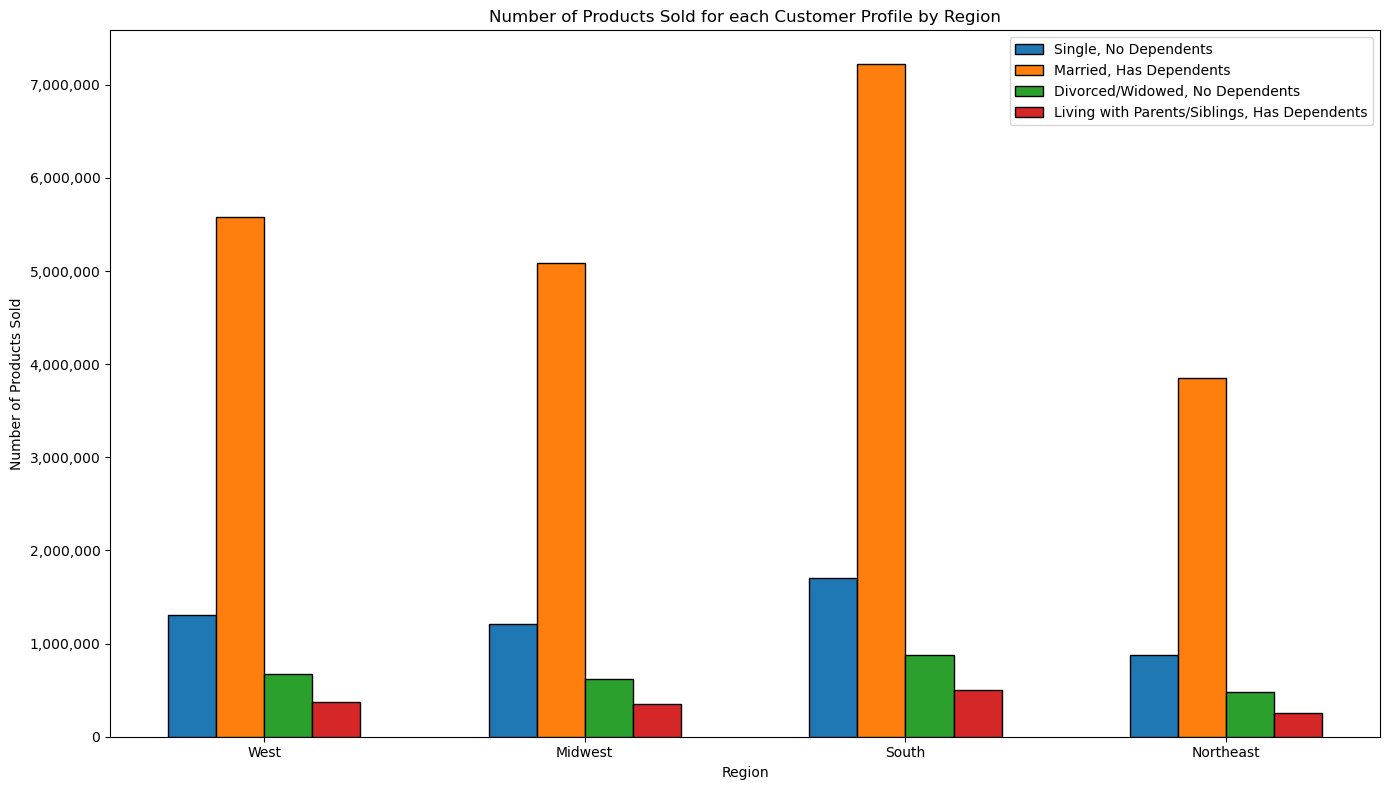

In [124]:
# Group by 'region' and 'customer_profile' and count occurrences
customer_profile_counts = df_secured_with_exclusion.groupby(['region', 'customer_profile']).size().unstack(fill_value=0)

# Define the order of regions and customer profiles for consistent plotting
regions = ['West', 'Midwest', 'South', 'Northeast']
customer_profiles = ['single, No dependents', 'married, Has dependents', 'divorced/widowed, No dependents', 'living with parents and siblings, Has dependents']

# Ensure customer_profile_counts has all regions and customer profiles
customer_profile_counts = customer_profile_counts.reindex(index=regions, columns=customer_profiles, fill_value=0)

# Setting the positions and width for the bars
bar_width = 0.15
r1 = np.arange(len(regions))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting
plt.figure(figsize=(14, 8))

plt.bar(r1, customer_profile_counts['single, No dependents'], width=bar_width, edgecolor='black', label='Single, No Dependents', zorder=3)
plt.bar(r2, customer_profile_counts['married, Has dependents'], width=bar_width, edgecolor='black', label='Married, Has Dependents', zorder=3)
plt.bar(r3, customer_profile_counts['divorced/widowed, No dependents'], width=bar_width, edgecolor='black', label='Divorced/Widowed, No Dependents', zorder=3)
plt.bar(r4, customer_profile_counts['living with parents and siblings, Has dependents'], width=bar_width, edgecolor='black', label='Living with Parents/Siblings, Has Dependents', zorder=3)

# Adding labels
plt.xlabel('Region')
plt.ylabel('Number of Products Sold')
plt.title('Number of Products Sold for each Customer Profile by Region')
plt.xticks([r + 1.5 * bar_width for r in range(len(regions))], regions)

# Custom y-axis formatting
def value_formatter(x, pos):
    return f'{x:,.0f}'
plt.gca().yaxis.set_major_formatter(FuncFormatter(value_formatter))

plt.legend()
plt.tight_layout()

customer_profile_region = plt.gcf()

In [92]:
df_secured_with_exclusion['customer_profile'].value_counts()

customer_profile
married, Has dependents                             21743711
single, No dependents                                5094410
divorced/widowed, No dependents                      2645271
living with parents and siblings, Has dependents     1481172
Name: count, dtype: int64

### 5.2 Age Groups by Region

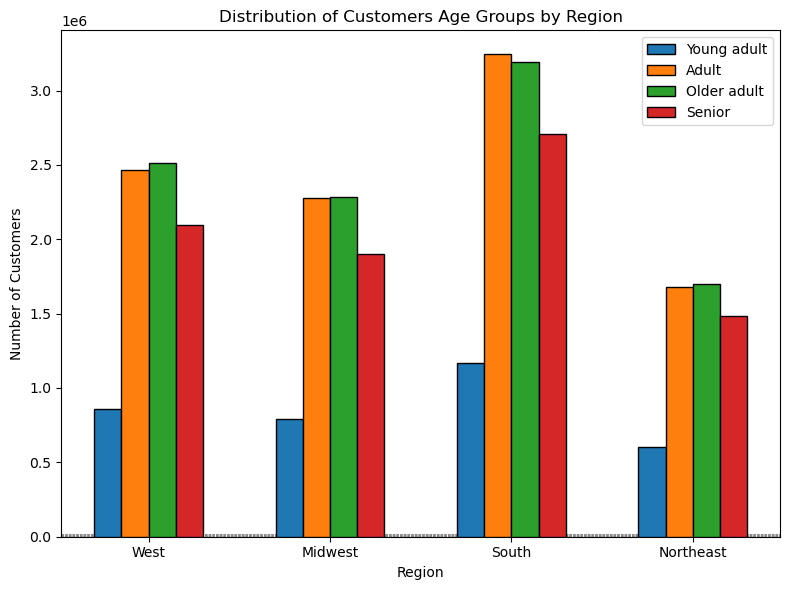

In [42]:
# Create a DataFrame age_group_counts that contains the counts of each age group for each region.
age_group_counts = df_secured_with_exclusion.groupby(['region', 'age_group']).size().unstack(fill_value=0)

regions = ['West', 'Midwest', 'South', 'Northeast']
age_groups = ['Young adult', 'Adult', 'Older adult', 'Senior']

# Ensure age_group_counts has all regions and age_groups
age_group_counts = age_group_counts.reindex(regions, axis=0).reindex(age_groups, axis=1, fill_value=0)

# Setting the positions and width for the bars
bar_width = 0.15
r1 = np.arange(len(regions))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting
plt.figure(figsize=(8, 6))

y_ticks = np.arange(0, 20000, 2500)
for y in y_ticks:
    plt.axhline(y=y, color='grey', linestyle='--', linewidth=0.5, zorder=0)

plt.bar(r1, age_group_counts['Young adult'], width=bar_width, edgecolor='black', label='Young adult', zorder=3)
plt.bar(r2, age_group_counts['Adult'], width=bar_width, edgecolor='black', label='Adult', zorder=3)
plt.bar(r3, age_group_counts['Older adult'], width=bar_width, edgecolor='black', label='Older adult', zorder=3)
plt.bar(r4, age_group_counts['Senior'], width=bar_width, edgecolor='black', label='Senior', zorder=3)

# Adding labels
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Age Groups by Region')
plt.xticks([r + 1.5 * bar_width for r in range(len(regions))], regions)

plt.legend()
plt.tight_layout()

age_groups_by_region = plt.gcf()

# Display the plot
plt.show()

### 5.3 Income Groups by Region

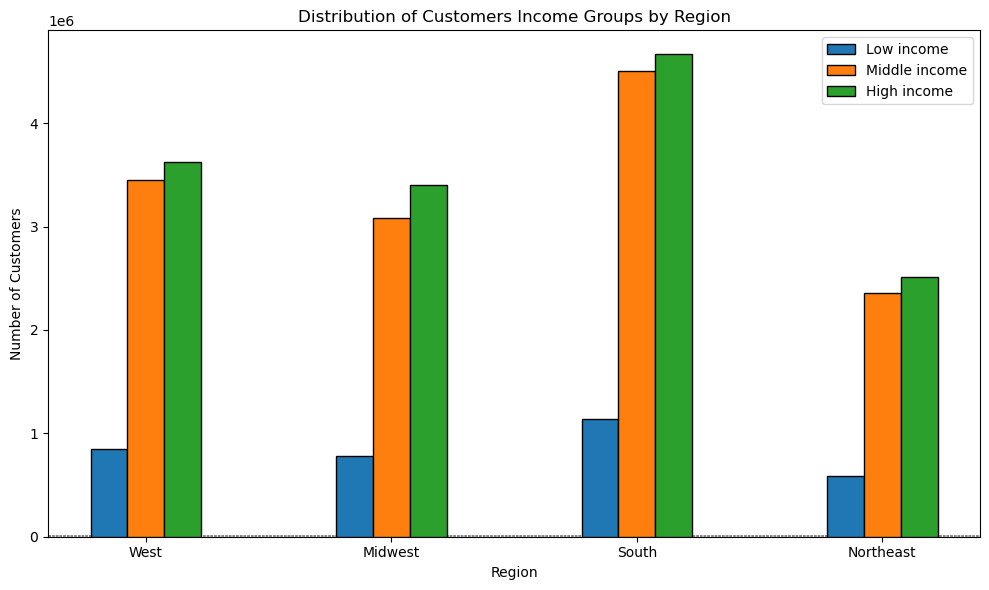

In [44]:
# Create a DataFrame income_group_counts that contains the counts of each income group for each region.
income_group_counts = df_secured_with_exclusion.groupby(['region', 'income_group']).size().unstack(fill_value=0)

regions = ['West', 'Midwest', 'South', 'Northeast']
income_groups = ['Low income', 'Middle income', 'High income']

# Ensure income_group_counts has all regions and income_groups
income_group_counts = income_group_counts.reindex(regions, axis=0).reindex(income_groups, axis=1, fill_value=0)

# Setting the positions and width for the bars
bar_width = 0.15
r1 = np.arange(len(regions))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.figure(figsize=(10, 6))

y_ticks = np.arange(0, 25000, 5000)
for y in y_ticks:
    plt.axhline(y=y, color='grey', linestyle='--', linewidth=0.5, zorder=0)
    
plt.bar(r1, income_group_counts['Low income'], width=bar_width, edgecolor='black', label='Low income', zorder=3)
plt.bar(r2, income_group_counts['Middle income'], width=bar_width, edgecolor='black', label='Middle income', zorder=3)
plt.bar(r3, income_group_counts['High income'], width=bar_width, edgecolor='black', label='High income', zorder=3)

# Adding labels
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Income Groups by Region')
plt.xticks([r + bar_width for r in range(len(regions))], regions)

plt.legend()
plt.tight_layout()

income_group_by_region = plt.gcf()

# Display the plot
plt.show()

### 5.4 Dependents Groups by Region

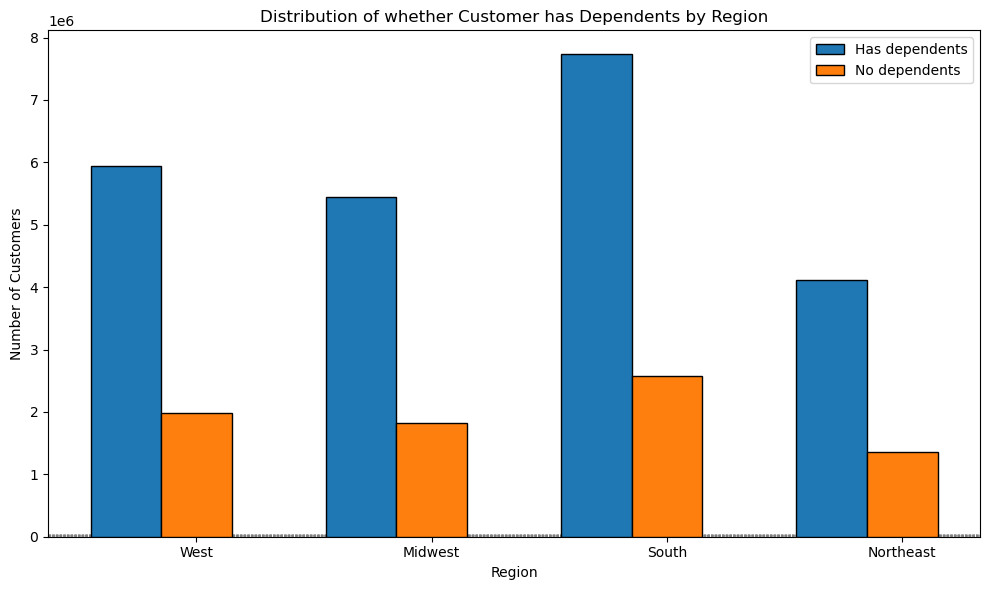

In [48]:
# Create a DataFrame income_group_counts that contains the counts of each dependents group for each region.
dependents_group_counts = df_secured_with_exclusion.groupby(['region', 'dependents_flag']).size().unstack(fill_value=0)

regions = ['West', 'Midwest', 'South', 'Northeast']
dependents_groups = ['Has dependents', 'No dependents']

# Ensure dependents_group_counts has all regions and dependents_groups
dependents_group_counts = dependents_group_counts.reindex(regions, axis=0).reindex(dependents_groups, axis=1, fill_value=0)

# Setting the positions and width for the bars
bar_width = 0.3
r1 = np.arange(len(regions))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.figure(figsize=(10, 6))

y_ticks = np.arange(0, 45000, 5000)
for y in y_ticks:
    plt.axhline(y=y, color='grey', linestyle='--', linewidth=0.5, zorder=0)

plt.bar(r1, dependents_group_counts['Has dependents'], width=bar_width, edgecolor='black', label='Has dependents', zorder=3)
plt.bar(r2, dependents_group_counts['No dependents'], width=bar_width, edgecolor='black', label='No dependents', zorder=3)

# Adding labels
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Distribution of whether Customer has Dependents by Region')
plt.xticks([r + bar_width for r in range(len(regions))], regions)

plt.legend(loc='upper right')
plt.tight_layout()

dependents_by_region = plt.gcf()

# Display the plot
plt.show()

## 6. Top Departments

In [50]:
# Count the number of products sold for each department
department_sales = df_secured_with_exclusion.groupby('department_id')['product_id'].count()

# Sort the departments by the number of products sold in descending order
department_sales_sorted = department_sales.sort_values(ascending = False)

# Limit to the top 10 departments
top_10_departments = department_sales_sorted.head(10)

In [52]:
top_10_departments

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
Name: product_id, dtype: int64

In [54]:
# Convert series to a dataframe
top_10_departments = top_10_departments.to_frame().reset_index()

In [56]:
top_10_departments

,department_id,product_id
0,4,9079273
1,16,5177182
2,19,2766406
3,7,2571901
4,1,2121731
5,13,1782705
6,3,1120828
7,15,1012074
8,20,1003834
9,9,822136


In [58]:
top_10_departments.rename(columns = {'product_id' : 'number_of_products_sold'}, inplace = True)

In [60]:
top_10_departments

,department_id,number_of_products_sold
0,4,9079273
1,16,5177182
2,19,2766406
3,7,2571901
4,1,2121731
5,13,1782705
6,3,1120828
7,15,1012074
8,20,1003834
9,9,822136


In [62]:
departments.rename(columns={'Unnamed: 0' : 'department_id'}, inplace=True)

In [64]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [66]:
top_10_departments_merged = top_10_departments.merge(departments, on = 'department_id', how = 'left')

In [68]:
top_10_departments_merged

,department_id,number_of_products_sold,department
0,4,9079273,produce
1,16,5177182,dairy eggs
2,19,2766406,snacks
3,7,2571901,beverages
4,1,2121731,frozen
5,13,1782705,pantry
6,3,1120828,bakery
7,15,1012074,canned goods
8,20,1003834,deli
9,9,822136,dry goods pasta


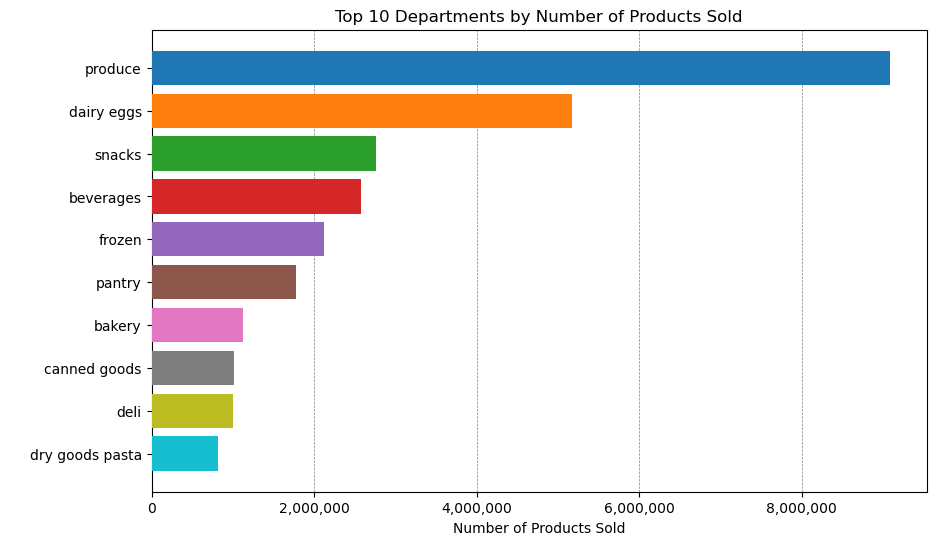

In [70]:
# Create horizontal bar chart showing the top 10 departments by number of products sold. 
plt.figure(figsize=(10, 6))

plt.title('Top 10 Departments by Number of Products Sold')

# Set x-ticks and add vertical grid lines
x_ticks = np.arange(0, 10000000, 2000000)
plt.xticks(x_ticks)
plt.grid(axis='x', linestyle='--', linewidth=0.5, color='grey', zorder=0)

# Define a function to format x-axis labels
def value_formatter(x, pos):
    return f'{x:,.0f}'
plt.xlabel('Number of Products Sold')
plt.gca().xaxis.set_major_formatter(FuncFormatter(value_formatter))

plt.ylabel(' ')

plt.gca().invert_yaxis()  # Invert y-axis to have the department with the highest sales on top

# Plot chart
colors = plt.get_cmap('tab10')  # 'Set1' is a color map available in matplotlib
plt.barh(top_10_departments_merged['department'], top_10_departments_merged['number_of_products_sold'],color=colors(range(10)), zorder=3)

top_departments = plt.gcf()

## 7. Export charts

In [130]:
# Export charts

top_departments.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top_departments.png'), dpi=300, bbox_inches='tight')
dependents_by_region.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependents_by_region.png'), dpi=300, bbox_inches='tight')
income_group_by_region.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_by_region.png'), dpi=300, bbox_inches='tight')
age_groups_by_region.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_groups_by_region.png'), dpi=300, bbox_inches='tight')
customer_profile_region.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profile_region.png'), dpi=300, bbox_inches='tight')

## 8. Export data

In [132]:
# Export data
df_secured_with_exclusion.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'secured_with_exclusion.pkl'))